# Laboratorio No. 4 - Generación de Variables Aleatorias Discretas
* Ricardo Méndez 21289
* Sara Echeverría 21371
* Melissa Pérez 21385

## Parte II - Ejercicios sobre Números Aleatorios

In [1]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

### Task 1
Considere un experimento en el cual se cuentan cuántos carros pasan por una calle determinada dentro de un rango de tiempo dado. Sabemos que el tiempo de espera para el n-ésimo evento puede ser modelando a través de una variable gamma. Considere el caso en el que usted está esperando que pase el 3er carro en la calle dada.

1. Para diferentes lambdas en [2, 1, 0.5], grafique las distribuciones gamma para cada uno de los casos.

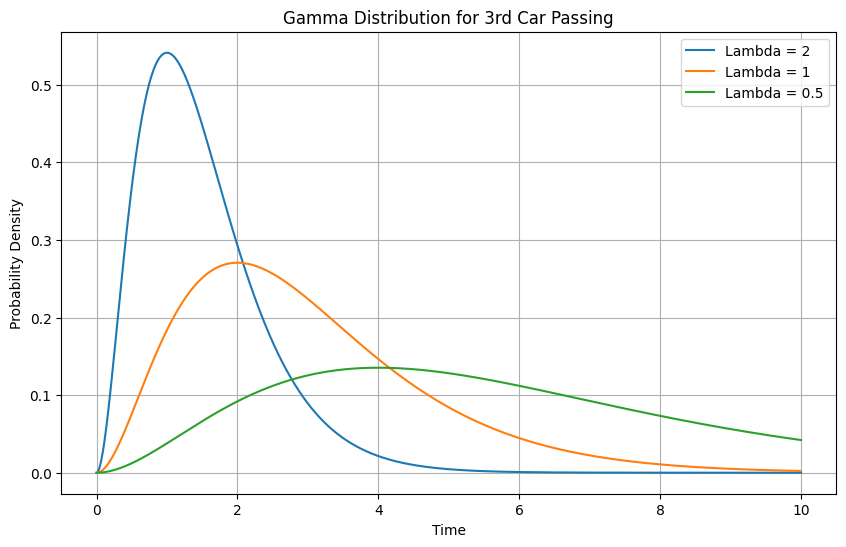

In [2]:
# parameters
shapeParameter = 3 

# different lambda values
lambdas = [2, 1, 0.5]  

# generate and plot the gamma distribution for each lambda
x = np.linspace(0, 10, 1000)

plt.figure(figsize=(10, 6))
for lmbda in lambdas:
    rateParameter = lmbda
    y = gamma.pdf(x, a=shapeParameter, scale=1/rateParameter)
    plt.plot(x, y, label=f'Lambda = {lmbda}')

plt.title('Gamma Distribution for 3rd Car Passing')
plt.xlabel('Time')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

2. ¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera y el número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número de ocurrencias de un evento?
* El gráfico anterior manifiesta el comportamiento para los distintos valores de λ, específicamente para los tiempos de espera para el paso del tercer carro
    * Mayor 𝜆 (2): Los tiempos de espera son más cortos y menos variables, lo que infiere que los carros pasan con mayor frecuencia. 
    * Menor λ (0.5): Los tiempos de espera son más largos y más variables, por lo que en comparación al valor de (2), los carros pasan con menor frecuencia.

Por lo que es posible afirmar que:
* Si el valor de 𝜆 aumenta, el tiempo de espera para el tercer carro es menor y se posee una mayor frecuencia de carros.

### Task 2

Considere las siguientes dos funciones generados de pseudo randoms y responda

### Generador 1:

$$
x_n = 5^5 \cdot x_{n-1} \mod \left(2^{35} - 1\right)
$$


### Generador 2:

$$
x_n = 7^5 \cdot x_{n-1} \mod \left(2^{31} - 1\right)
$$


Y considere al generador de números aleatorios uniformes en (0, 1) default de su lenguaje de programación de
elección, como un tercer generador de números aleatorios.

### Generador 3: (baseline)

$$
x_n = \text{Math.random}()
$$


1. Construya un programa que compare estos tres generadores a través de un histograma de asteriscos (de 0
a 1 con saltos de 0.1) Use tres comparaciones para 100, 5,000 y 100,000 repeticiones.

In [2]:
# Funciones para los generadores

# Generador 1
def generator1(seed, n):
    a = 5**5
    m = 2**35 - 1
    x = seed
    sequence = []
    for _ in range(n):
        x = (a * x) % m
        sequence.append(x / m)
    return sequence

# Generador 2
def generator2(seed, n):
    a = 7**5
    m = 2**31 - 1
    x = seed
    sequence = []
    for _ in range(n):
        x = (a * x) % m
        sequence.append(x / m)
    return sequence

# Generador 3 (Python's default random number generator)
def generator3(n):
    return np.random.rand(n)

In [3]:
# Función para crear histograma de asteriscos
def print_histogram(data, bins=10):
    hist, bin_edges = np.histogram(data, bins=np.linspace(0, 1, bins + 1))
    for i in range(bins):
        print(f"{bin_edges[i]:.1f} - {bin_edges[i+1]:.1f}: {'*' * hist[i]}")

In [4]:
# Configuración y comparación
n_values = [100, 5000, 100000]
seed = 12345

for n in n_values:
    print(f"\n--- Number of Iterations: {n} ---")
    
    # Generador 1
    data1 = generator1(seed, n)
    print("\nGenerator 1 Histogram:")
    print_histogram(data1)
    
    # Generador 2
    data2 = generator2(seed, n)
    print("\nGenerator 2 Histogram:")
    print_histogram(data2)
    
    # Generador 3
    data3 = generator3(n)
    print("\nGenerator 3 Histogram:")
    print_histogram(data3)


--- Number of Iterations: 100 ---

Generator 1 Histogram:
0.0 - 0.1: ******
0.1 - 0.2: ***************
0.2 - 0.3: ***********
0.3 - 0.4: ***********
0.4 - 0.5: *******
0.5 - 0.6: **************
0.6 - 0.7: **********
0.7 - 0.8: ************
0.8 - 0.9: *******
0.9 - 1.0: *******

Generator 2 Histogram:
0.0 - 0.1: ***********
0.1 - 0.2: ************
0.2 - 0.3: ***********
0.3 - 0.4: ************
0.4 - 0.5: ******
0.5 - 0.6: ************
0.6 - 0.7: ********
0.7 - 0.8: *********
0.8 - 0.9: *****
0.9 - 1.0: **************

Generator 3 Histogram:
0.0 - 0.1: ********
0.1 - 0.2: ***
0.2 - 0.3: ***************
0.3 - 0.4: ************
0.4 - 0.5: **********
0.5 - 0.6: **************
0.6 - 0.7: *******
0.7 - 0.8: ********
0.8 - 0.9: ***************
0.9 - 1.0: ********

--- Number of Iterations: 5000 ---

Generator 1 Histogram:
0.0 - 0.1: ******************************************************************************************************************************************************************

2. ¿Qué generador le parece mejor? (considere solamente Generador 1 y Generador 2) ¿Por qué?
    - Ambos generadores tienen mejoras de uniformidad en cuanto se aumenta el número de iteraciones, por lo que puede decirse que tienen un comportamiento muy similar. Esto nos indica que dependiendo del contexto de uso, uno funcionaría mejor que otro por sus ventajas individuales. 
    - Al elegir uno de ellos, parece mejor el *Generador 1* por tener un mejor desempeño en términos de uniformidad con un menor número de muestras.

### Task 3

Considere la siguiente integral y responda
$$
\theta = \int_{-\infty}^{\infty} e^{-x^2} \, dx = 1.7724538509051602
$$


1. Transforme la integral a una con límites de 0 a 1, muestre su procedimiento

2. Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones.

Si se toma `x = 1/t - 1`, entonces `dx = -1/t^2 dt`. De esta forma, adentro de la integral se obtiene:

$$
e^{-\left(\frac{1}{t} - 1\right)^2} \left(-\frac{1}{t^2}\right) \, dt
$$

Debido a que cuando `x \to -\infty`, `t \to 1`, y cuando `x \to \infty`, `t \to 0`. Al final, la integral queda con los límites de 0 a 1 como:

$$
\int_{0}^{1} \frac{1}{t^2} e^{-\left(\frac{1}{t} - 1\right)^2} \, dt
$$


In [2]:
def integrand(t):
    return (1/t**2) * np.exp(-((1/t) - 1)**2)

def montecarlo_integration(func, a, b, num_samples):
    samples = np.random.uniform(a, b, num_samples)
    sample_values = func(samples)
    integral = (b - a) * np.mean(sample_values)
    return integral

a = 0
b = 1

iterations = [100, 10000, 100000]

results = {n: montecarlo_integration(integrand, a, b, n) for n in iterations}
results


{100: 0.9075429470554159,
 10000: 0.8889607053731599,
 100000: 0.8864696692292037}

### Task 4

Considere la siguiente integral y responda

$$
\theta = \int_{0}^{\infty} \int_{0}^{x} e^{-(x + y)} \, dy \, dx = 0.5
$$


1. Transforme la integral múltiple a una en la que ambos límites sean de 0 a 1, muestre su procedimiento
2. Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones

Si se reemplaza `x = u / (1 - u)` y `y = v / (1 - v) * u / (1 - u)`.  <br>
De esta forma los diferenciales cambian a `dx = 1 / (1 - u)^2 du` y `dy = x / (1 - v)^2 dv`.  <br>
La integral doble transformada se puede expresar como:

$$
\int_{0}^{1} \int_{0}^{u} \frac{e^{-\left(\frac{u}{1-u} + \frac{v u}{(1-v)(1-u)}\right)}}{(1-u)^4 (1-v)^2} \, dv \, du
$$


In [9]:
def f(u, v):
    return np.exp(-(u/(1-u) + (v * u)/((1-v)*(1-u)))) / ((1-u)**4 * (1-v)**2)

def montecarlo_double_integral(N):
    u_samples = np.random.rand(N)
    v_samples = np.random.rand(N)
    integral_approx = np.mean(f(u_samples, v_samples))
    return integral_approx

results = {
    100: montecarlo_double_integral(100),
    10000: montecarlo_double_integral(10000),
    100000: montecarlo_double_integral(100000)
}

results

{100: 10.278145018979647, 10000: 7.018640564727222, 100000: 8.379736076275588}

## Parte III - Ejercicios sobre Generación de V.A P1

### Task 1

Genere muestras aleatorias a partir de una distribución geométrica utilizando el método de transformación inversa.
1. Defina una distribución geométrica objetivo con el parámetro p=0.3
2. Implemente el método de transformación inversa para generar muestras aleatorias a partir de la
distribución geométrica.
3. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución geométrica.
4. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución geométrica.

C:\Users\sarap\AppData\Local\Temp\ipykernel_12452\2901775005.py:15: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, pmf, 'r', markerfmt='ro', basefmt="r-", label='Theoretical PMF', use_line_collection=True)


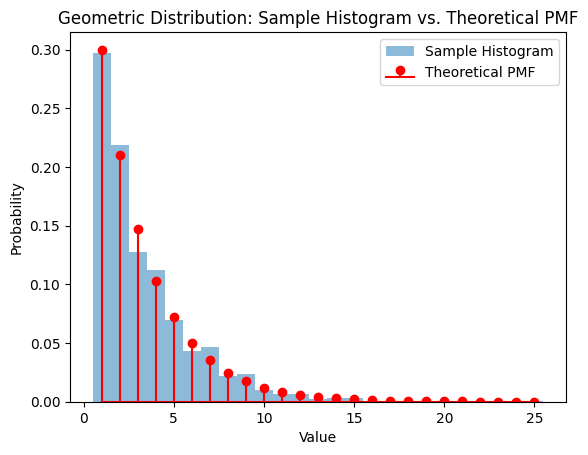

In [3]:
def generateGeometric(p, size=1):
    # generate uniform random numbers between 0 and 1
    U = np.random.uniform(0, 1, size)
    
    # apply the inverse transform method
    X = np.ceil(np.log(1 - U) / np.log(1 - p))
    return X

def plotHistogramAndPmf(samples, p):
    # calculate the histogram
    plt.hist(samples, bins=np.arange(1, max(samples)+2)-0.5, density=True, alpha=0.5, label='Sample Histogram')
    k = np.arange(1, int(max(samples))+1)
    pmf = (1 - p)**(k-1) * p
    
    plt.stem(k, pmf, 'r', markerfmt='ro', basefmt="r-", label='Theoretical PMF', use_line_collection=True)
    plt.title('Geometric Distribution: Sample Histogram vs. Theoretical PMF')
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

# parameter p for the geometric distribution and random sample generation
p = 0.3
samples = generateGeometric(p, 1000)

# plot the histogram and compare with the theoretical PMF
plotHistogramAndPmf(samples, p)

### Task 2

Investigue alguna aplicación del método de transformación inversa e implementenlo.
1. Defina la distribución que está utilizando y los parámetros de la misma
2. . Implemente el método de transformación inversa para generar muestras aleatorias a partir de la
distribución
3. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución usada
4. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución usada

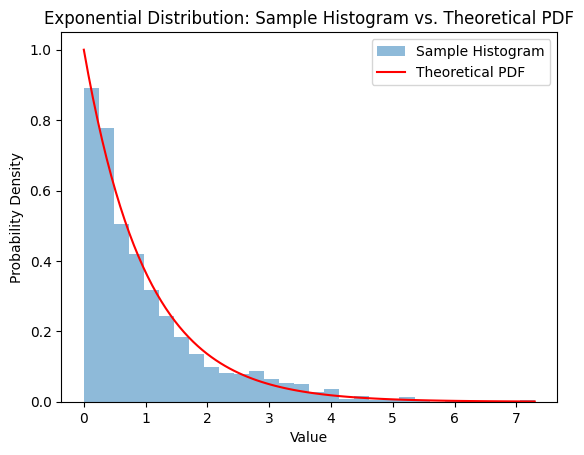

In [4]:
def generateExponential(lambdaParam, size=1):
    # generate uniform random numbers between 0 and 1
    U = np.random.uniform(0, 1, size)
    
    # apply the inverse transform method for the exponential distribution
    X = -np.log(U) / lambdaParam
    return X

def plotHistogramAndPdf(samples, lambdaParam):
    # calculate the histogram
    plt.hist(samples, bins=30, density=True, alpha=0.5, label='Sample Histogram')
    x = np.linspace(0, max(samples), 100)
    pdf = lambdaParam * np.exp(-lambdaParam * x)
    
    plt.plot(x, pdf, 'r-', label='Theoretical PDF')
    plt.title('Exponential Distribution: Sample Histogram vs. Theoretical PDF')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

# lambda parameter for the exponential distribution and random sample generation
lambdaParam = 1.0
samples = generateExponential(lambdaParam, 1000)

# plot the histogram and compare with the theoretical PDF
plotHistogramAndPdf(samples, lambdaParam)